# Study $p_T$ 
last edit Dec-19, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/'

# (1) Load data and apply selection cuts not previously imposed
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [4]:
[e_e_pi, e_e_pi_n,_] = load_SIDIS_data( Nruns = -1,
                                        subdirname = "sidisdvcs_27Oct2022_commit_2fe215f",
                                        do_e_e_pi=True, 
                                        do_e_e_pi_n=False, 
                                        do_e_e_pi_FreeP=False,
                                        do_all_vars=True, 
                                       fdebug=2)
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,e_e_pi_FreeP_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_Mx_cut=False,
                                                                                                    fdebug=0);

Run number  6421 (1/86 runs)
Loaded 385297  d(e,e'π+) events
Loaded 162638  d(e,e'π-) events
Run number  6422 (2/86 runs)
Loaded 366918  d(e,e'π+) events
Loaded 154361  d(e,e'π-) events
Run number  6426 (3/86 runs)
Loaded 326566  d(e,e'π+) events
Loaded 137027  d(e,e'π-) events
Run number  6429 (4/86 runs)
Loaded 411636  d(e,e'π+) events
Loaded 172739  d(e,e'π-) events
Run number  6430 (5/86 runs)
Loaded 78744  d(e,e'π+) events
Loaded 33100  d(e,e'π-) events
Run number  6431 (6/86 runs)
Loaded 320743  d(e,e'π+) events
Loaded 135621  d(e,e'π-) events
Run number  6432 (7/86 runs)
Loaded 400648  d(e,e'π+) events
Loaded 168797  d(e,e'π-) events
Run number  6433 (8/86 runs)
Loaded 456686  d(e,e'π+) events
Loaded 189078  d(e,e'π-) events
Run number  6437 (9/86 runs)
Loaded 157942  d(e,e'π+) events
Loaded 65258  d(e,e'π-) events
Run number  6442 (10/86 runs)
Loaded 428592  d(e,e'π+) events
Loaded 177955  d(e,e'π-) events
Run number  6444 (11/86 runs)
Loaded 76379  d(e,e'π+) events
Loaded 3198

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS

(e,e π+ )
26562112 events after original cut (100.0 %)
18073707 events after p-theta cut (68.0 %)
18073707 events after Mx cut (68.0 %)
18073707 events after Kinematical cut (68.0 %)
(e,e π- )
11055256 events after original cut (100.0 %)
10709556 events after p-theta cut (96.9 %)
10709556 events after Mx cut (96.9 %)
10709556 events after Kinematical cut (96.9 %)
 
Done applying event-selection cuts


# (2) Count event statistics

In [5]:
Stats = dict()
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    Stats["$d(e,e'"+pi_label+")$"]  = float(len(e_e_pi_pass_cuts[pi_ch]))
Stats["$d(e,e'\\pi^{+})/d(e,e'\\pi^{-})$"] = Stats["$d(e,e'\\pi^{+})$"]/Stats["$d(e,e'\\pi^{-})$"]
display(Stats)

{"$d(e,e'\\pi^{+})$": 18073707.0,
 "$d(e,e'\\pi^{-})$": 10709556.0,
 "$d(e,e'\\pi^{+})/d(e,e'\\pi^{-})$": 1.6876243048731432}

# (3) Plot $p_T$ in bins of $Q^2$

In [6]:
def plot_untagged_SIDIS_variable(var  = 'Q2', 
                        var_tagged = None, # None = same as (untagged) var
                        bins = np.linspace(1.8,7.8,31),
                        xScaling=1,
                        varlabel = '$Q^2$',
                        varlabel_tagged = '',
                        varunits = '[(GeV/c)$^2$]',
                        xticks = None, 
                        fdebug=1, 
                        ylim_ratio=(0,10),ylim_hists=None,
                        add_published_pips2pims_ratio=[],
                        do_only_top_2=False, 
                        do_add_legends=True,
                        do_save_figure=True):#{
    
    if fdebug>2: print(bins)
    ax = dict()
    
    fig = plt.figure(figsize=(16,7),tight_layout=True)
    
    h,NeventsTot = dict(),dict()
    # compare untagged to tagged seperately for π+ and π-
    ax[1] = fig.add_subplot(1,2,1)

    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):

        # d(e,e'π)
        df = e_e_pi_pass_cuts[pi_ch]
        NeventsTot['untagged'] = len(df)
        x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_squares( df[var], ax=ax[1],
                                                                                bins=bins, xScaling=xScaling,
                                                                                density=True, color=pi_color, alpha=0.5,
                                                                                label="$(e,e'"+pi_label+")$" )
        ax[1].step(x,h['untagged'+pi_ch],'-',color=pi_color,where='mid')
        
    set_axes(ax[1],
                 varlabel+varunits,
                 'Frequency [a.u.]', 
                 title="$(e,e'\pi)$ events as a function of "+varlabel,
                 do_add_grid=True,
                 remove_ticks_x=False,
                 do_add_legend=do_add_legends,
                 xticks=xticks,
                 ylim=ylim_hists)
         
    # Take the ratio of π+/π-
    ax[2] = fig.add_subplot(1,2,2)
    # add existing data
    do_add_legend = True
    if add_published_pips2pims_ratio is not []:
        do_add_legend = False
        for dataset in add_published_pips2pims_ratio:
            plot_pT_published_pips2pims_ratio( dataset, ax=ax[2], 
                                      vars_2_plot=['R_D'],
                                      labels_2_plot=['Deuteron'],
                                      colors=['m'],
                                      markers=['s'])


    R, R_err = dict(), dict()
    for datalabel,color,scaleFactor in zip(['untagged'],
                                           ['k'],
                                           [Stats["$d(e,e'\\pi^{+})/d(e,e'\\pi^{-})$"]]):#{
        R[datalabel]      = np.zeros(len(x))
        R_err[datalabel]  = np.zeros(len(x))
        cutoff = 1./NeventsTot[datalabel]
        
        Npts = len(h_err[datalabel+'piminus'])
        for i in range(Npts):
            R[datalabel][i] = (h[datalabel+'piplus'][i]/np.max([cutoff,h[datalabel+'piminus'][i]])) * scaleFactor
            R_err[datalabel][i] = R[datalabel][i] * np.sqrt(  np.square(h_err[datalabel+'piplus'][i]
                                                                        /np.max([cutoff,h[datalabel+'piplus'][i]]) )                                       
                                                            + np.square(h_err[datalabel+'piminus'][i]
                                                                        /np.max([cutoff,h[datalabel+'piminus'][i]])) )    
            
        # plt.step ( x, R, color=color, where='mid', label=None )
        plt.errorbar ( x=x, xerr=x_err, 
                      y=R[datalabel], yerr=R_err[datalabel], 
                      markersize=8,
                      color=color, marker='o', markeredgecolor='k',
                      linestyle='None',label='This work-'+datalabel,                      
                      capsize=4, capthick=1, alpha=1 )
    #}
    # cosmetics
    set_axes(ax[2],varlabel+varunits,
             "$N(e,e' \pi^+) / N(e,e' \pi^-)$", 
             title="Cross-section ratio $\pi^+/\pi^-$",
             do_add_grid=True, do_add_legend=do_add_legend,
             xticks=xticks, 
             ylim=ylim_ratio);
    
    if do_add_legend is False:
        ax[2].legend(bbox_to_anchor=(0.63,0.55),fontsize=18);
    
    if do_save_figure:
        save_figure(filename=figures_path + var + '.pdf')
    return ax
#}

### (3.1) $p_T$ in the $q$-frame

In [7]:
def plot_pT_published_pips2pims_ratio( dataset = 'JLAB2012', 
                                      ax=None, 
                                      vars_2_plot=['R_H','R_D'],
                                      labels_2_plot=['Free-p','Deuteron'],
                                      colors=['red','blue'],
                                      markers=['s','s'] ):
    '''
    plot pT published pips2pims ratio
    
    
    input
    ---------
    vars_2_plot    'R_H'  / 'R_D' / [...]
    dataset        'JLAB2012' - Phys. Rev. C. 85 015202 (2012)
    
    '''
    
    if dataset == 'JLAB2012':
        dataset_label = 'JLAB2012'
    
    pT_data = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/ExistingData/'+dataset+'/pT_data.csv')
    pT_data['p_T'] = np.sqrt(pT_data['P_t^2 (GeVc^2)'])
    
    if ax is None:
        fig,ax=plt.subplots(figsize=(8,5))
        set_axes(ax,'$p_T$','$R_H$',do_add_grid=True)
    
    for var_2_plot,label_2_plot,color,marker in zip(vars_2_plot,labels_2_plot,colors,markers):
        ax.errorbar( pT_data['p_T'], 
                    pT_data[var_2_plot], pT_data['d '+var_2_plot], 
                    linestyle='None',
                    marker=marker,color=color,
                    capthick=1,capsize=4,
                    markerfacecolor='w',
                    label = label_2_plot+' '+dataset_label
                   )
    
    

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/pi_qFrame_pT.pdf


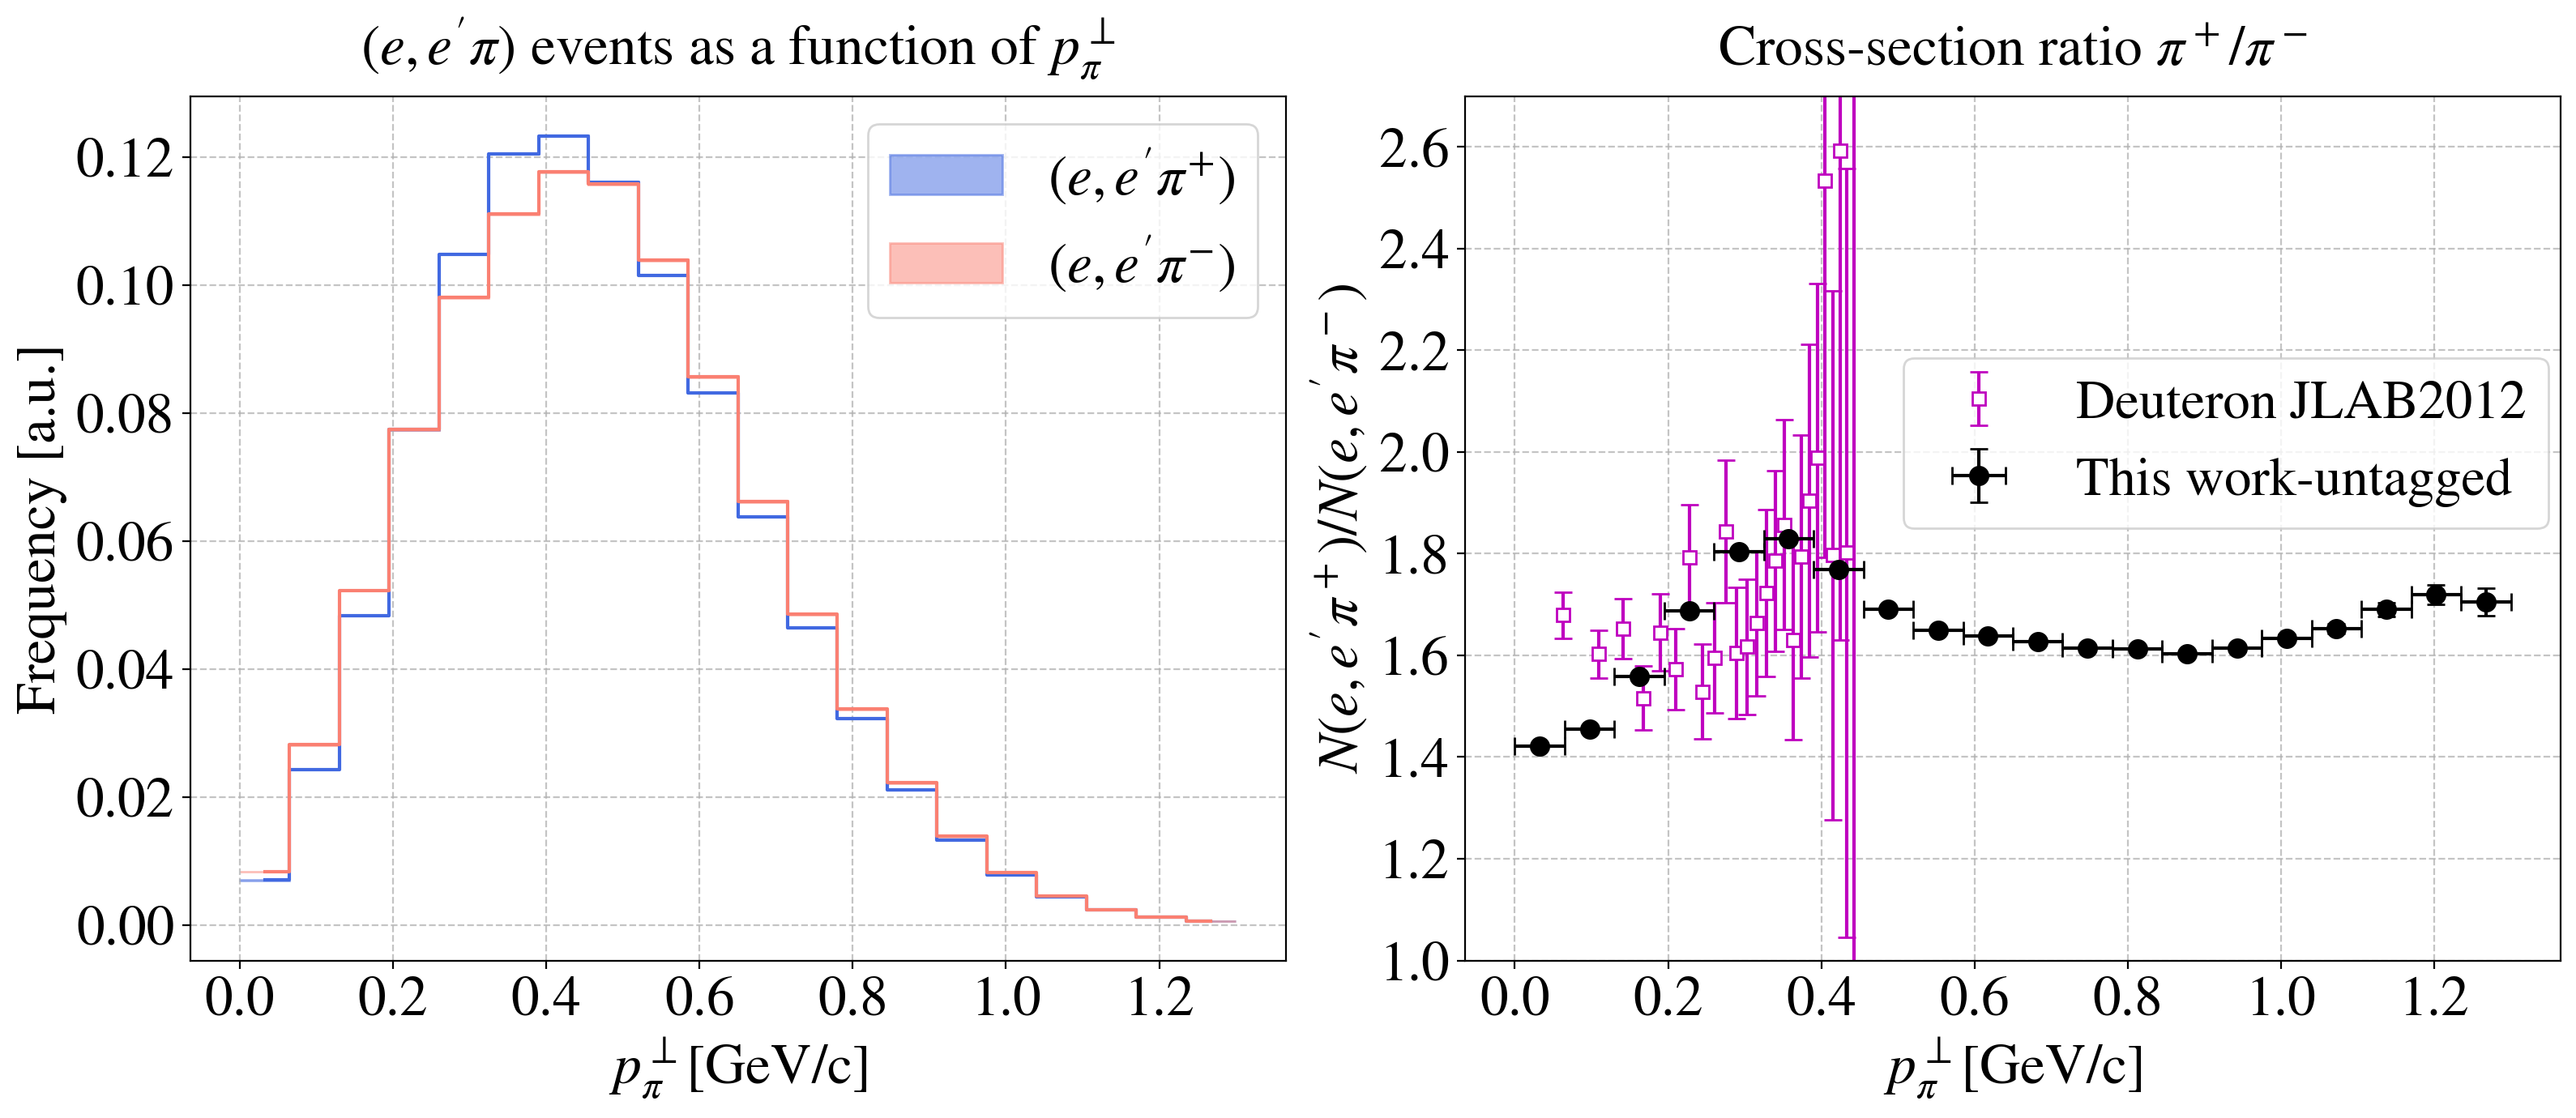

In [18]:
ax = plot_untagged_SIDIS_variable(var  = 'pi_qFrame_pT',                    
                    bins = np.linspace(0,1.3,21),                    
                    varlabel = '$p_{\pi}^{\perp}$', 
                    varunits = '[GeV/c]', 
                         add_published_pips2pims_ratio = ['JLAB2012'], ylim_ratio=(1,2.7) )
ax[2].legend(loc=(0.4,0.5),fontsize=24);


### (3.7) $p_T$  in kinematical bins

In [9]:
import scipy as sp
from scipy.stats import chi

def fit_function_pT( x, mu_Px=0, sigma_Px=0.2 ):
    '''
    The Chi distribution is the positive square root of the sum of squares of independent random variables,
    each following a standard normal distribution:
    
        Z = sqrt(X_1^2 + X_2^2 + X_3^2 + X_4^2 + .....)
    
    For k=2, this is the function that represents the distribution of 
    
        p_T = \sqrt(Px^2 + Py^2)
        
    where Px and Py are Gaussians,
    assuming mu_Py = mu_Px, and sigma_Py = sigma_Px.
    
    '''
    rv = chi(2, mu_Px, sigma_Px)    
    y_fit = rv.pdf(x)
    y_fit_normed = y_fit/np.sum(y_fit)
    return y_fit_normed


def fit_pT( x, y, y_err, fdebug=0, do_plot_fit=False, color='k' ):
    '''
    return 
    -------
    fit_results     dict
    '''
    
    fit_results = dict()
    if np.max(y)>0:
        popt,pcov=sp.optimize.curve_fit(fit_function_pT, xdata=x, ydata=y, p0=[np.mean(x[x<0.5]),np.std(x)], ) # sigma=y_err, 
        mu_fit  = popt[0]
        mu_err  = np.sqrt(pcov[0,0])
        if mu_err ==np.inf: mu_err  = np.max([mu_fit ,0.01])
        sig_fit = popt[1]
        sig_err = np.sqrt(pcov[1,1])
        if sig_err==np.inf: sig_err = np.max([sig_fit ,0.01])
    else:
        mu_fit,mu_err,sig_fit,sig_err = 0,0,0,0

    fit_results['mu_fit'] = mu_fit
    fit_results['mu_err'] = mu_err
    fit_results['sig_fit'] = sig_fit
    fit_results['sig_err'] = sig_err
    
    if fdebug>1:
        print(mu_fit , mu_err)
        print(sig_fit, sig_err)
        
    if do_plot_fit:
        x_fit = np.linspace(np.min(x),np.max(x),100)
        plt.plot( x_fit, fit_function_pT( x_fit, mu_fit , sig_fit )*len(x_fit)/len(x), '--', color=color );
    return fit_results

### (3.8) $p_T$ in bins of $Q^2$

In [10]:
Q2_bins_untagged   = np.linspace(2.15,5.15,21)
Q2_widths_untagged = (Q2_bins_untagged[1]-Q2_bins_untagged[0])/2*np.ones(len(Q2_bins_untagged))
for Q2_bin,Q2_width,Q2_idx in zip(Q2_bins_untagged, Q2_widths_untagged ,range(len(Q2_bins_untagged))):
    Q2_min,Q2_max = Q2_bin-Q2_width, Q2_bin+Q2_width
    print('%d, %.3f < Q2 < %.3f'%(Q2_idx,Q2_min,Q2_max))
print('')    
N_Q2 = len(Q2_bins_untagged)

0, 2.075 < Q2 < 2.225
1, 2.225 < Q2 < 2.375
2, 2.375 < Q2 < 2.525
3, 2.525 < Q2 < 2.675
4, 2.675 < Q2 < 2.825
5, 2.825 < Q2 < 2.975
6, 2.975 < Q2 < 3.125
7, 3.125 < Q2 < 3.275
8, 3.275 < Q2 < 3.425
9, 3.425 < Q2 < 3.575
10, 3.575 < Q2 < 3.725
11, 3.725 < Q2 < 3.875
12, 3.875 < Q2 < 4.025
13, 4.025 < Q2 < 4.175
14, 4.175 < Q2 < 4.325
15, 4.325 < Q2 < 4.475
16, 4.475 < Q2 < 4.625
17, 4.625 < Q2 < 4.775
18, 4.775 < Q2 < 4.925
19, 4.925 < Q2 < 5.075
20, 5.075 < Q2 < 5.225



saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/pi_qFrame_pT_Q2_bins.pdf


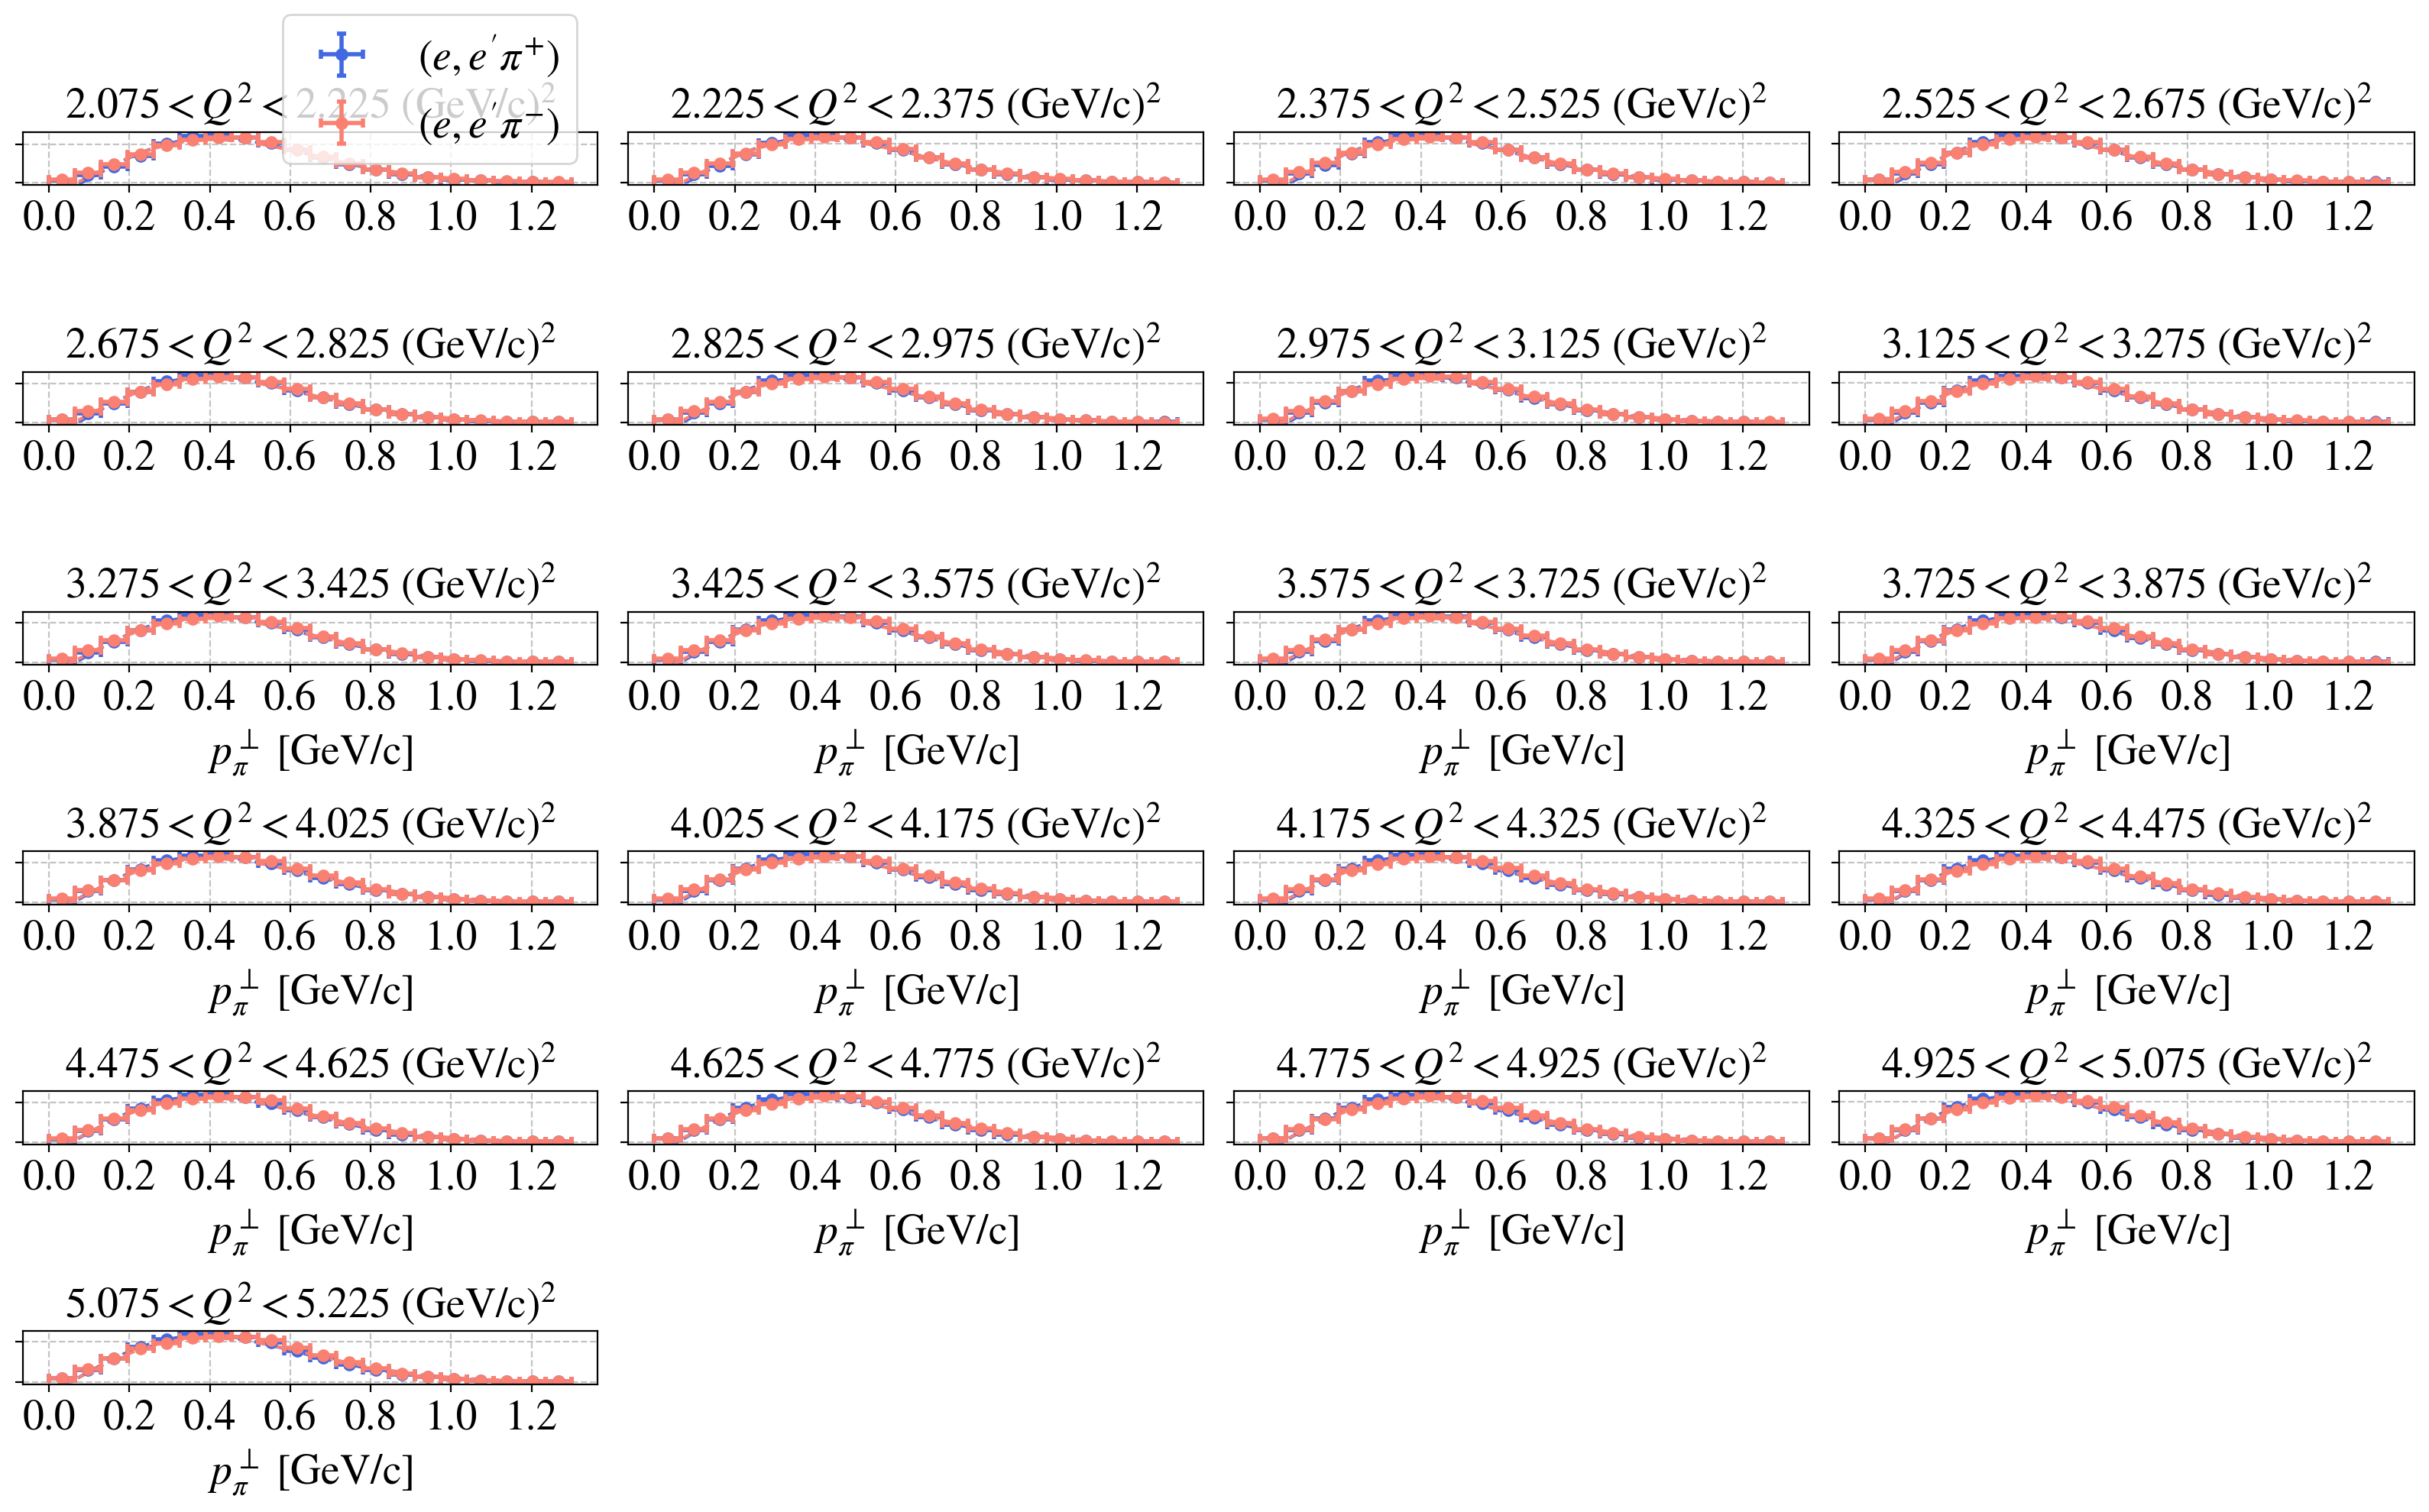

In [11]:
N_Q2_to_Plot = N_Q2 #N_Q2
bins = np.linspace(0,1.3,21)
fig = plt.figure(figsize=(16,10),tight_layout=True)
sig_in_bin_untagged,sig_err_in_bin_untagged = np.zeros((N_Q2,2)),np.zeros((N_Q2,2))

for Q2_bin,Q2_width,Q2_idx in zip(Q2_bins_untagged ,Q2_widths_untagged ,range(N_Q2)):#{
    Q2_min,Q2_max = Q2_bin-Q2_width, Q2_bin+Q2_width
    if Q2_idx < N_Q2_to_Plot: ax = fig.add_subplot( ceil(N_Q2_to_Plot/4),4,  Q2_idx+1 )
        
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
        
        # cut on Q2
        df = e_e_pi_pass_cuts[pi_ch]
        df_in_bin = df[  (Q2_min < df.Q2) & (df.Q2 < Q2_max) ]

        if Q2_idx < N_Q2_to_Plot:
            # plot
            x,y,x_err,y_err = plot_step_hist( df_in_bin["pi_qFrame_pT"], bins = bins, 
                           color=pi_color,
                           density=True, 
                           label= "$(e,e'"+pi_label+")$" )
        
        # fit to a chi distribution function
        fit_results = fit_pT( x, y, y_err, 0, do_plot_fit=True,color=pi_color )
        sig_in_bin_untagged[Q2_idx,pi_idx-1]    = fit_results['sig_fit']
        sig_err_in_bin_untagged[Q2_idx,pi_idx-1]= fit_results['sig_err']


    #}    
    if Q2_idx < N_Q2_to_Plot:
        set_axes(ax,'$p_{\pi}^{\perp}$ [GeV/c]' if Q2_idx >= 8 else '',
             'Frequency [a.u.]' if pi_idx==1 else '', 
             title= "$%.3f < Q^2 < %.3f$ (GeV/c)$^2$"%(Q2_min,Q2_max),
             fontsize=20,
             remove_ticks_x = False,
             remove_ticks_y = True,
             do_add_grid=True, 
             do_add_legend=True if Q2_idx==0 else False)
#}
save_figure(figures_path + 
            'pi_qFrame_pT' +             
            '_Q2_bins' +         
            '.pdf')    

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/Untegged_pi_qFrame_pT_sigma_Q2_bins.pdf


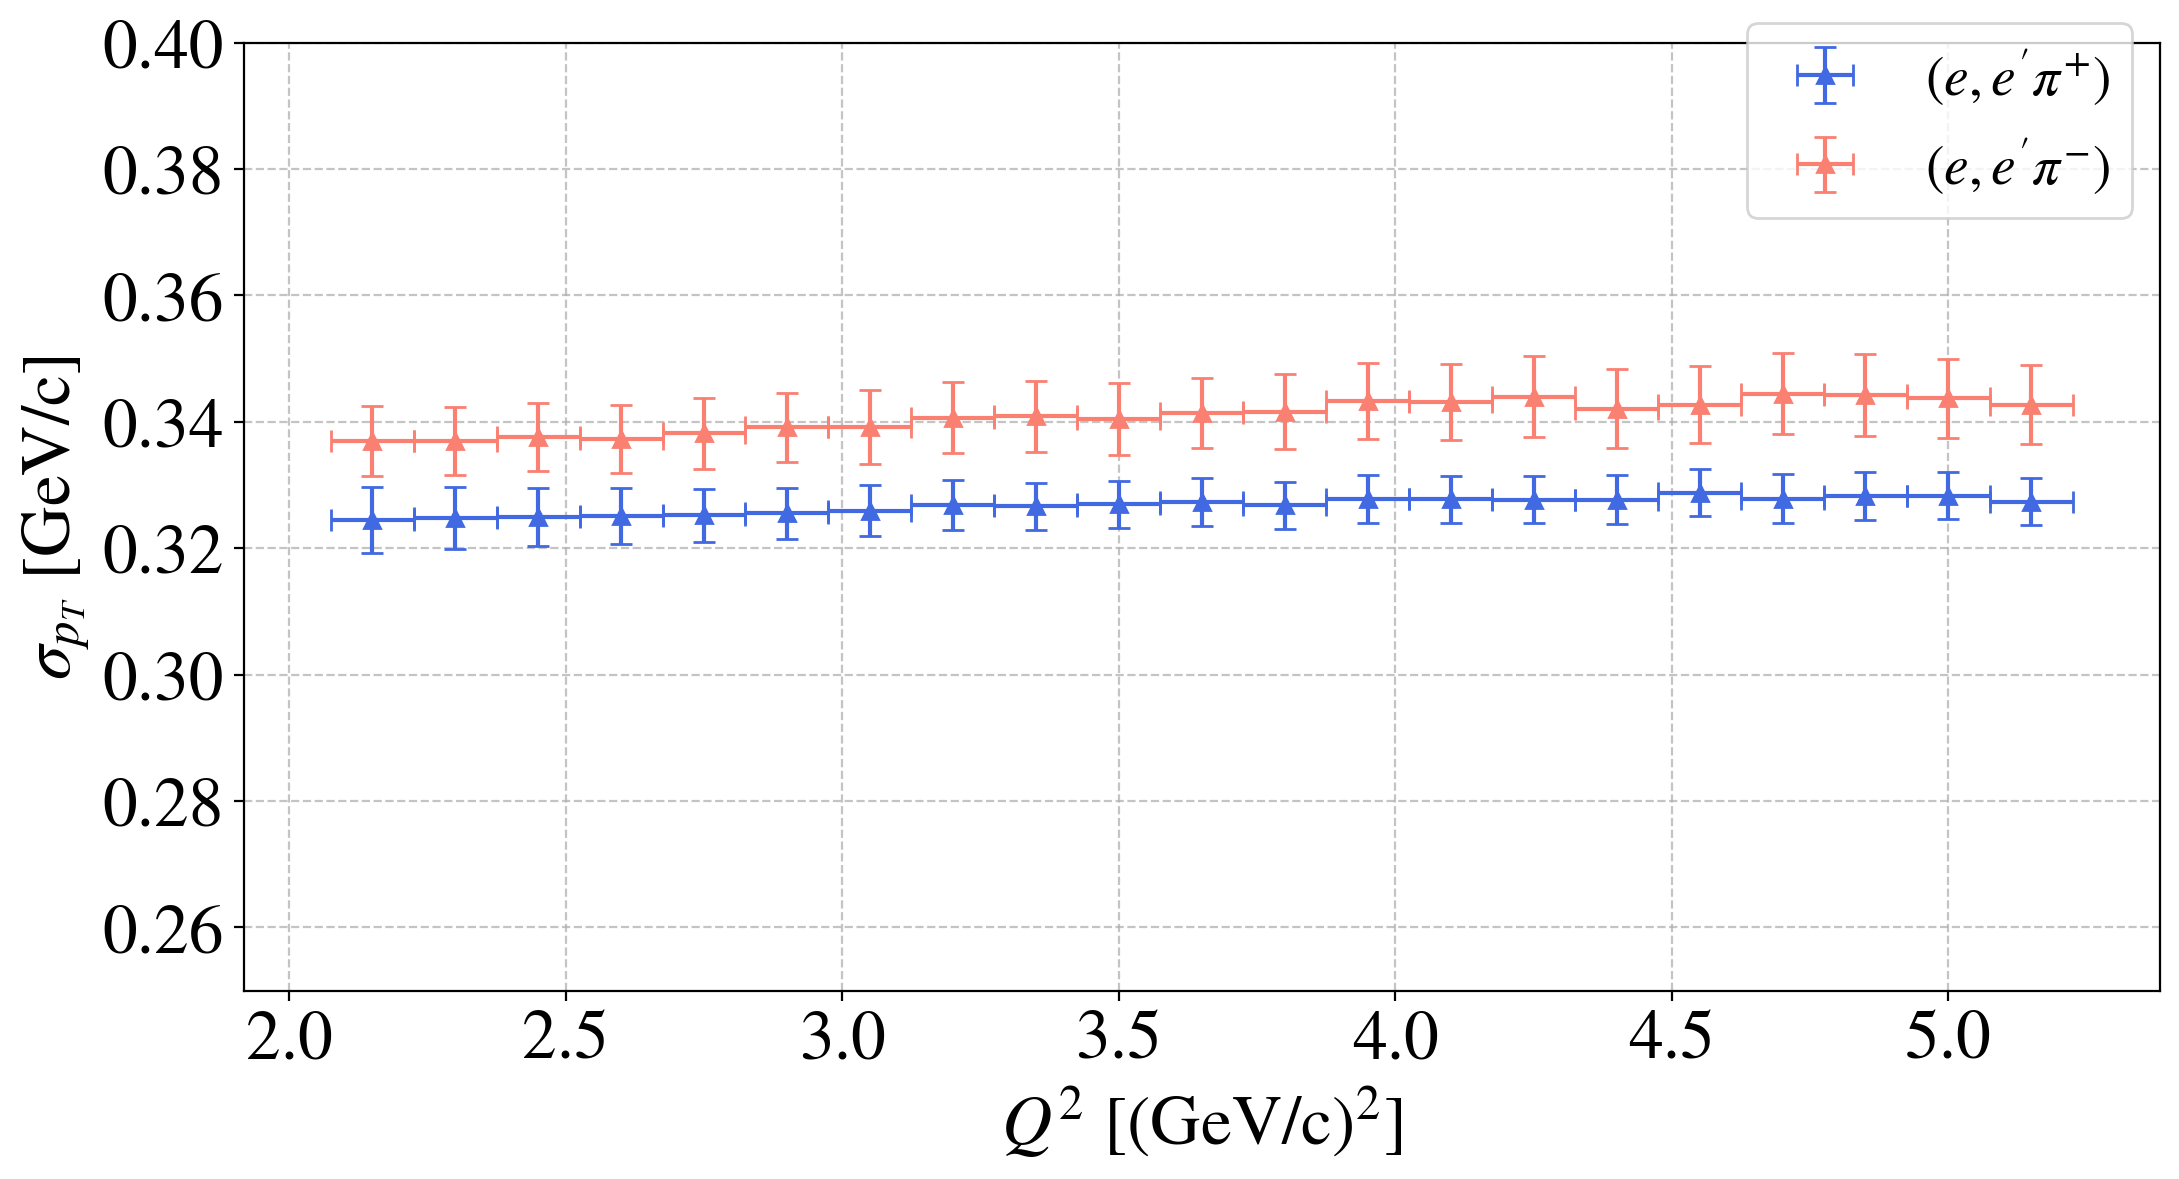

In [12]:
fig = plt.figure(figsize=(11,6),tight_layout=True)
ax = fig.add_subplot( 1, 1, 1 )
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    
    sig_vs_Q2     = sig_in_bin_untagged[:,pi_idx-1]
    sig_err_vs_Q2 = sig_err_in_bin_untagged[:,pi_idx-1]

    ax.errorbar(x=Q2_bins_untagged,
                    xerr=Q2_widths_untagged,
                    y=sig_vs_Q2, 
                    yerr=sig_err_vs_Q2, 
                    color=pi_color,
                    capsize=4, marker='^', markeredgecolor=pi_color, linestyle='None', 
                    label="$(e,e'"+pi_label+")$" )
        
        
    set_axes(ax,'$Q^2$ [(GeV/c)$^2$]' ,
             '$\\sigma_{p_T}$ [GeV/c]' ,
             remove_ticks_x=False,
             remove_ticks_y=False,
             do_add_grid=True,do_add_legend=True, 
             ylim=(0.25,0.4)
            )
    ax.legend(bbox_to_anchor=(1.,1.05),loc='best',fontsize=20)
save_figure(figures_path   + 
            'Untegged_'
            'pi_qFrame_pT' +             
            '_sigma'       + 
            '_Q2_bins'     +         
            '.pdf')        

### (3.7) $p_T$  in bins of $x_B$ and $z$
For untagged data in bins of x and z


In [13]:
z_bins   = np.linspace(0.35,0.80,4)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.5,4)
x_widths = (x_bins[1] - x_bins[0])/2*np.ones(len(z_bins))
for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(len(z_bins))):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%d, %.3f < z < %.3f'%(z_idx,z_min,z_max))
print('')    
for x_bin,x_width,x_idx in zip(x_bins,x_widths,range(len(x_bins))):
    x_min,x_max = x_bin-x_width, x_bin+x_width
    print('%d, %.3f < x < %.3f'%(x_idx,x_min,x_max))    
N_x = len(x_bins)
N_z = len(z_bins)    
# print('x bins:',x_bins)
# print('x_err:',x_err)
# print('x_widths:',x_widths)
# print('z bins:',z_bins)
# print('z width:',z_widths)

0, 0.340 < z < 0.360
1, 0.490 < z < 0.510
2, 0.640 < z < 0.660
3, 0.790 < z < 0.810

0, 0.150 < x < 0.250
1, 0.250 < x < 0.350
2, 0.350 < x < 0.450
3, 0.450 < x < 0.550


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/pi_qFrame_pT_z_and_xB_bins.pdf


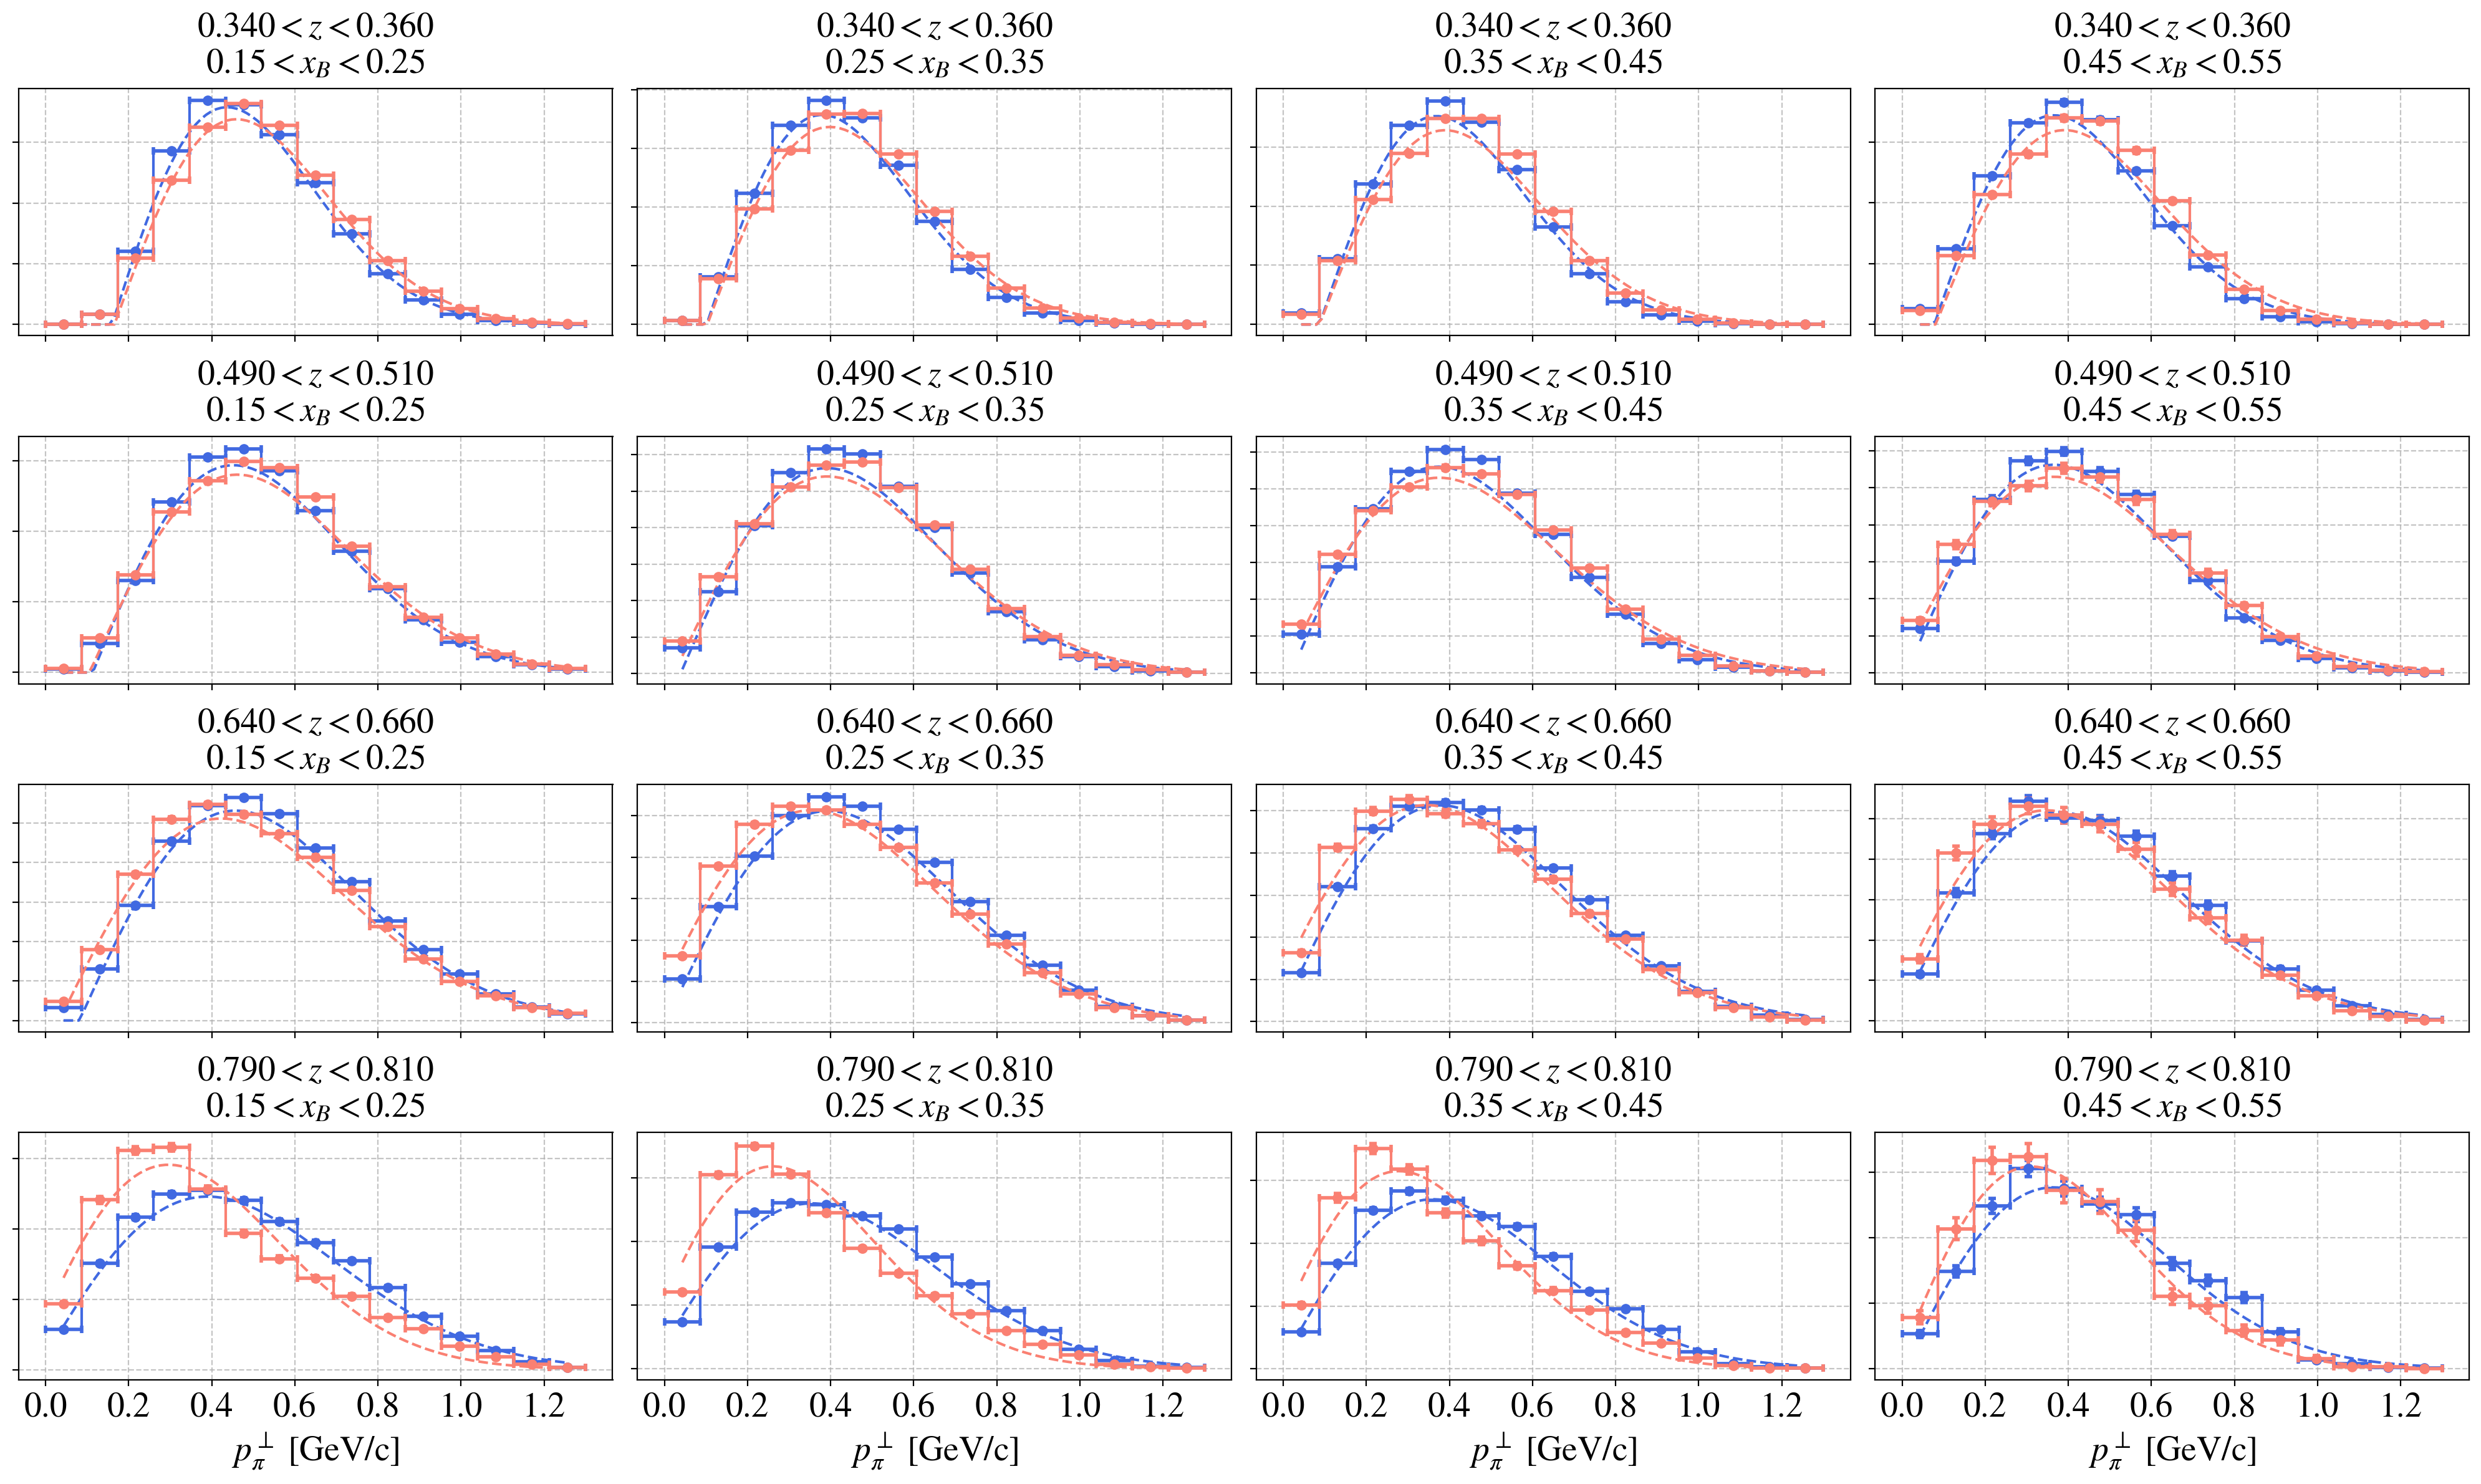

In [14]:
bins = np.linspace(0,1.3,16)
Nsubplots = 16
i = 0
mu_in_bin,sig_in_bin,sig_err_in_bin = np.zeros((N_z,N_x,2)),np.zeros((N_z,N_x,2)),np.zeros((N_z,N_x,2))

for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{
    z_min,z_max = z_bin-z_width, z_bin+z_width

    # if i>25: break
    for x_bin,x_width,x_idx in zip(x_bins,x_widths,range(N_x)):
        x_min,x_max = x_bin-x_width, x_bin+x_width
        bin_label = "$%.3f < z < %.3f$"%(z_min,z_max) + "\n" + "$%.2f < x_B < %.2f$"%(x_min,x_max)
        
        if i%Nsubplots==0: #{
            fig = plt.figure(figsize=(20,12),tight_layout=True)
        #}
        # ax = fig.add_subplot( N_x,  N_z, z_idx + N_z*x_idx + 1 )
        ax = fig.add_subplot( int(np.sqrt(Nsubplots)), int(np.sqrt(Nsubplots)), np.mod(i,Nsubplots)+1 )
        for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

            df = e_e_pi_pass_cuts[pi_ch]
            # cut on xB and z
            df = df[  (z_min < df.Zpi) & (df.Zpi < z_max) 
                    & (x_min < df.xB ) & (df.xB  < x_max) ]
            # plot
            x,y,x_err,y_err = plot_step_hist( df["pi_qFrame_pT"], bins = bins, color=pi_color, density=True )
            
            # fit to a chi distribution function
            fit_results = fit_pT( x, y, y_err, 0, do_plot_fit=True,color=pi_color )
            mu_in_bin[z_idx,x_idx,pi_idx-1]     = fit_results['mu_fit']
            sig_in_bin[z_idx,x_idx,pi_idx-1]    = fit_results['sig_fit']
            sig_err_in_bin[z_idx,x_idx,pi_idx-1]= fit_results['sig_err']
                
        set_axes(ax,'$p_{\pi}^{\perp}$ [GeV/c]' if np.mod(i,Nsubplots)>=Nsubplots-np.sqrt(Nsubplots) else '',
                 '', # 'Frequency [a.u.]' if z_idx==0 else '', 
                 title= bin_label ,
                 fontsize=20,
                 remove_ticks_x = False if np.mod(i,Nsubplots)>=Nsubplots-np.sqrt(Nsubplots) else True,
                 remove_ticks_y = True,
                 do_add_grid=True, 
                 do_add_legend=False)
        i = i+1        
    #}    
    if i%Nsubplots==0: #{
        save_figure(figures_path + 
                    'pi_qFrame_pT' + 
                    '_z_and_xB_bins' + 
                    '.pdf')    
    #}
#}

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/pi_qFrame_pT_sigma_z_and_xB_bins.pdf


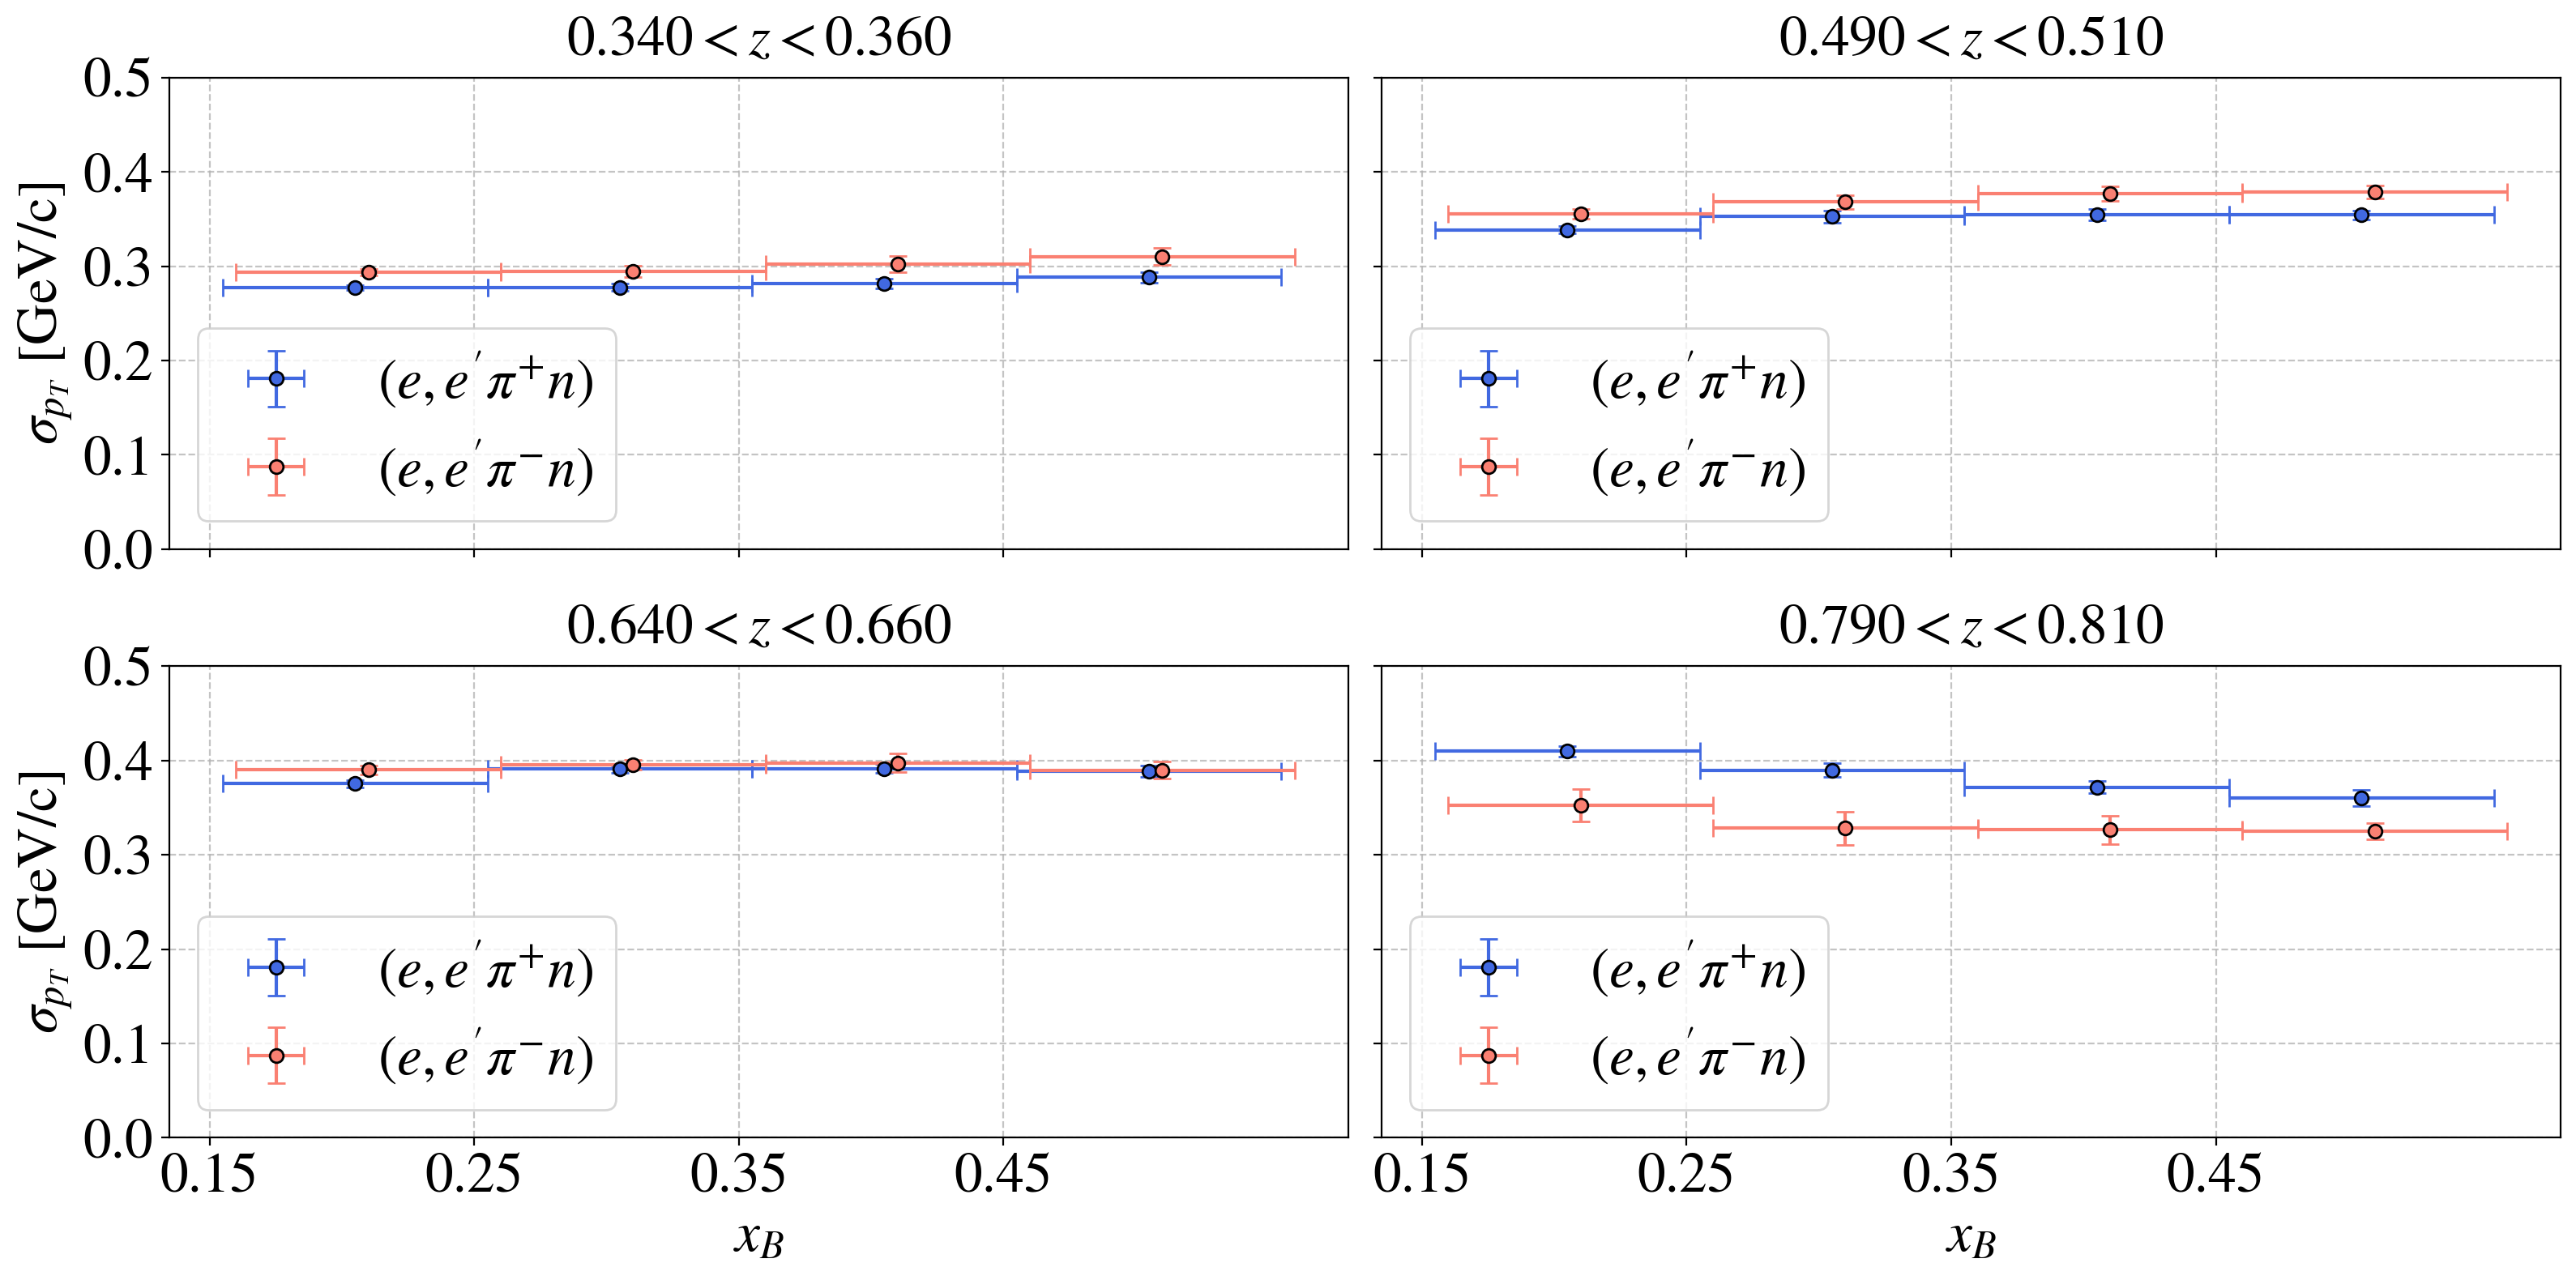

In [15]:
fig = plt.figure(figsize=(16,8),tight_layout=True)
for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{
    z_min,z_max = z_bin-z_width, z_bin+z_width

    ax = fig.add_subplot( 2, 2, z_idx+1 )
    
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
        sig_vs_x     = sig_in_bin[z_idx,:,pi_idx-1]
        sig_err_vs_x = sig_err_in_bin[z_idx,:,pi_idx-1]


        ax.errorbar(x=x_bins + 0.005*pi_idx*np.ones(len(x_bins)), 
                    xerr=x_widths,
                    y=sig_vs_x, 
                    yerr=sig_err_vs_x, 
                    color=pi_color,
                    capsize=4, marker='o', markeredgecolor='k', linestyle='None', 
                    label="$(e,e'"+pi_label+"n)$" )
        
    set_axes(ax,'$x_B$' if z_idx>=2 else '',
             '$\\sigma_{p_T}$ [GeV/c]' if np.mod(z_idx,2)==0 else '',
             remove_ticks_x=False if z_idx>=2 else True,
             remove_ticks_y=False if np.mod(z_idx,2)==0 else True,
             title="$%.3f < z < %.3f$"%(z_min,z_max) ,
             do_add_grid=True,do_add_legend=True, 
             xticks=np.arange(0.15,0.55,0.1),
             ylim=(0,0.5))
save_figure(figures_path     + 
            'pi_qFrame_pT'   + 
            '_sigma'         +  
            '_z_and_xB_bins' +             
            '.pdf')        